
# Linear Regression Model
---

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


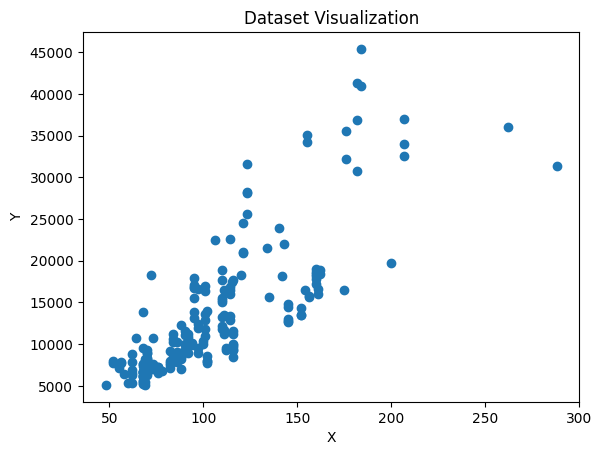

In [20]:

# Load dataset
data = pd.read_csv('CarPrice_Assignment.csv')
X = data['horsepower'].values

Y = data['price'].values


# Visualize dataset
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset Visualization')
plt.show()


In [21]:
X = data.drop(['price','CarName','fueltype','aspiration','doornumber','carbody',
               'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],axis=1).values
Y = data['price'].values

# Asegurarnos de que X sea una matriz 2D
if len(X.shape) == 1:
    X = X.reshape(-1, 1)

# Simple linear regression prediction 
# Calculamos w y b usando la fórmula de mínimos cuadrados
X_mean = np.mean(X, axis=0)
Y_mean = np.mean(Y)

# Calculamos w (pendiente)
numerator = np.sum((X - X_mean) * (Y - Y_mean)[:, np.newaxis], axis=0)
denominator = np.sum((X - X_mean) ** 2, axis=0)
w = numerator / denominator

# Calculamos b (intercepto)
b = Y_mean - np.sum(w * X_mean)

# Hacemos las predicciones
Y_pred = np.sum(w * X, axis=1) + b

# Mean Squared Error (MSE)
mse = np.mean((Y - Y_pred) ** 2)

# R-squared calculation
ss_residual = np.sum((Y - Y_pred) ** 2)
ss_total = np.sum((Y - np.mean(Y)) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r_squared:.4f}")

Mean Squared Error (MSE): 1453796892.62
R-squared: -21.8907


Final weights shape:

 (16,)
First few weights: [13035.48190676 -1156.05168497   247.22998928   351.4028033
   173.25401396]


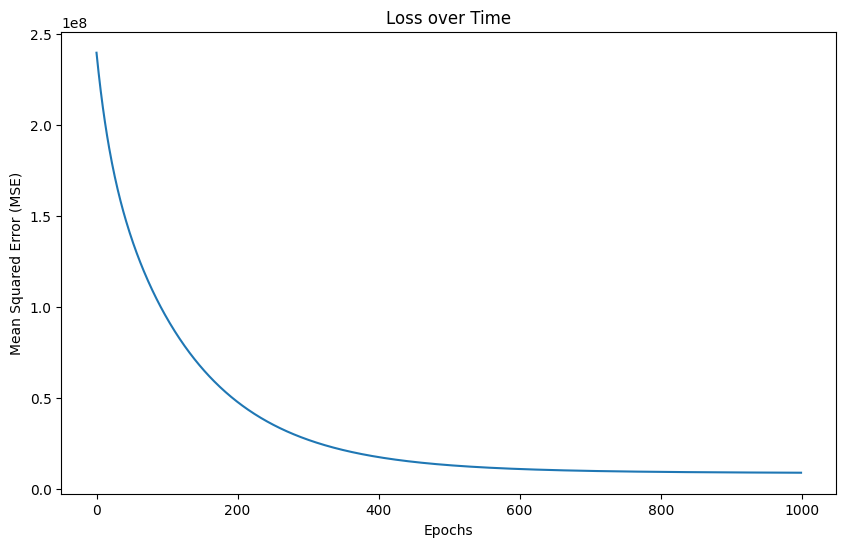


Resultados finales:
Mean Squared Error (MSE): 9109201.50
R-squared: 0.8566


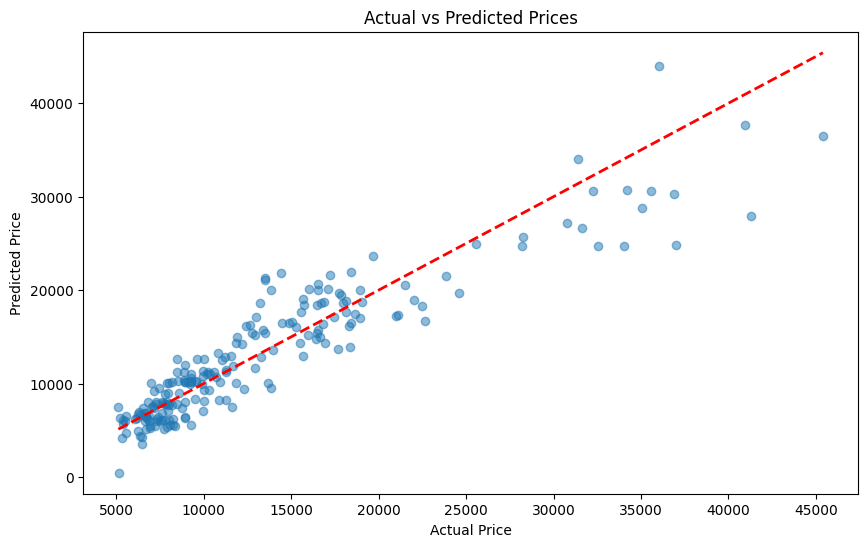

In [22]:
# Normalizar los datos (importante para el gradient descent)

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Añadir columna de unos para el término independiente (bias)
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
n_features = X.shape[1]
weights = np.zeros(n_features)  # Inicializar pesos incluyendo el bias
learning_rate = 0.002
epochs = 1000
n = len(X)

# Store history for visualization
loss_history = []

# Gradient Descent
for epoch in range(epochs):
    # Predictions
    Y_pred = np.dot(X, weights)
    
    # Calculate and store loss (MSE)
    loss = np.mean((Y - Y_pred) ** 2)
    loss_history.append(loss)
    
    # Calculate gradients
    gradients = -(2/n) * np.dot(X.T, (Y - Y_pred))
    
    # Update weights
    weights = weights - learning_rate * gradients

# Final parameters
print("Final weights shape:", weights.shape)
print("First few weights:", weights[:5])

# Plotting the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss over Time')
plt.show()

# Calcular predicciones finales
Y_pred_final = np.dot(X, weights)

# Calcular MSE y R² finales
mse = np.mean((Y - Y_pred_final) ** 2)
r_squared = 1 - (np.sum((Y - Y_pred_final) ** 2) / np.sum((Y - np.mean(Y)) ** 2))

print(f"\nResultados finales:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r_squared:.4f}")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y, Y_pred_final, alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()